In [33]:
import os
import pickle, bz2

import tqdm
from bokeh.io import output_notebook, show


In [34]:
# loader
def load_dataset(file_path):
    with bz2.BZ2File(file_path, 'rb') as f:
        dataset = pickle.load(f)
    return dataset

def print_dataset_structure(dataset_dict, name=None):
    first_level_keys = set()
    second_level_keys = set()
    third_level_keys = set()



    for key, value in dataset_dict.items():
        first_level_keys.add(key)
        if isinstance(value, dict):
            for sub_key in value.keys():
                second_level_keys.add(sub_key)
                if isinstance(value[sub_key], dict):
                    for sub_sub_key in value[sub_key].keys():
                        third_level_keys.add(sub_sub_key)

    if name is not None:
        print(f"Dataset Structure for Dataset: {name}")
    else:
        print("Dataset Structure:")


    print("----"*10)
    print("First Level Keys:")
    print(first_level_keys)
    print("----"*10)
    print("Second Level Keys:")
    print(list(second_level_keys)[:10])
    print("----"*10)
    print("Third Level Keys:")
    print(third_level_keys)
    print("----"*10)
    print("\n")

def print_all_datasets_structure(dataset_path_list):
    for dataset_pkl in dataset_pkls:
        dataset_path = os.path.join(data_dir, dataset_pkl)
        dataset_dict = load_dataset(dataset_path)
        print_dataset_structure(dataset_dict, name=dataset_pkl)
        del dataset_dict

# get all split_n_bar_phrases from last key
def get_split_n_bar_phrases(dataset_path_list):
    if not isinstance(dataset_path_list, list):
        dataset_path_list = [dataset_path_list]

    split_n_bar_phrases = list()

    for dataset_pkl_ in dataset_path_list:
        dataset_dict_ = load_dataset(os.path.join(data_dir, dataset_pkl_))
        for key, value in dataset_dict_.items():
            for sub_key, sub_value in value.items():
                hvo_splits = sub_value['split_n_bar_phrases']
                for hvo_split in hvo_splits:
                    hvo_split.metadata.update({'collection': dataset_pkl_.replace('.pkl.bz2', ''), 'sample_id': sub_key})

                split_n_bar_phrases.extend(sub_value['split_n_bar_phrases'])

    return split_n_bar_phrases

import random

def get_randome_phrases(split_n_bar_phrases, n=1):
    # returns hvos and their indexes in the split_n_bar_phrases list
    if not isinstance(split_n_bar_phrases, list):
        split_n_bar_phrases = [split_n_bar_phrases]
    sample_ix = random.sample(range(len(split_n_bar_phrases)), n)
    sample_hvo_phrases = [split_n_bar_phrases[ix] for ix in sample_ix]

    return sample_hvo_phrases, sample_ix




from bokeh.models import Tabs, TabPanel
import warnings
import logging
from bokeh.util.warnings import BokehUserWarning, BokehDeprecationWarning

def setup_quiet_bokeh():
    """Set up comprehensive bokeh warning suppression"""
    # Suppress warnings
    warnings.filterwarnings("ignore", category=BokehUserWarning)
    warnings.filterwarnings("ignore", category=BokehDeprecationWarning)
    warnings.filterwarnings("ignore", message=".*bokeh.*")

    # Suppress logging
    logging.getLogger('bokeh').setLevel(logging.ERROR)

    # Suppress other common warnings that might appear with bokeh
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=UserWarning)

def create_multitab_from_figures(hvos,  tab_titles=None, show_tabs= True):
    """
    Create a multitab visualizer from already-generated bokeh figures.

    Parameters:
    -----------
    figures : List
        List of bokeh figure objects
    tab_titles : List[str]
        List of titles for each tab
    show_tabs : bool, default=True
        Whether to immediately show the tabs

    Returns:
    --------
    Tabs
        Bokeh Tabs object containing all the figures
    """
    setup_quiet_bokeh()
    output_notebook()

    figures = []

    generate_titles = False
    if tab_titles is None:
        tab_titles = []
        generate_titles = True

    if not isinstance(hvos, list):
        hvos = [hvos]
    for ix, hvo in enumerate(hvos):
        figure = hvo.to_html_plot(
            filename='',
            save_figure=False,
            show_figure=False)
        figures.append(figure)
        if generate_titles:
            tab_titles.append(f"Tab {ix+1}")

    if not isinstance(tab_titles, list):
        tab_titles = [tab_titles]
    if not tab_titles:
        tab_titles = [f"Tab {i+1}" for i in range(len(figures))]
    if len(figures) == 0:
        raise ValueError("No figures provided to create tabs")

    if len(figures) != len(tab_titles):
        raise ValueError("Number of figures must match number of tab titles")

    panels = []

    for figure, title in zip(figures, tab_titles):
        panel = TabPanel(child=figure, title=title)
        panels.append(panel)

    tabs = Tabs(tabs=panels)

    if show_tabs:
        show(tabs)

    return tabs




In [35]:
# LOAD DATASETS

data_dir = "data/triple_streams/split_2bars/rest" # "data/triple_streams/split_2bars/lmd"

# find all .pkl.bz2 files in the directory
dataset_pkls = [f for f in os.listdir(data_dir) if f.endswith('.pkl.bz2')]

# print the structure of each dataset
print_all_datasets_structure(dataset_pkls)

# load all loops from all datasets
split_n_bar_phrases = get_split_n_bar_phrases(dataset_pkls)

# print the number of phrases loaded
print(f"Number of split_n_bar_phrases loaded: {len(split_n_bar_phrases)}")


Dataset Structure for Dataset: taptamdrum_hvo_output_both_is_and.pkl.bz2
----------------------------------------
First Level Keys:
{'AllAvailableStreams'}
----------------------------------------
Second Level Keys:
['13_p2_rep2', '218_p1_simple', '214_p1_simple', '177_p1_complex', '107_p2_simple', '8_p4_rep2', '105_p2_simple', '49_p1_rep1', '98_p2_complex', '151_p1_simple']
----------------------------------------
Third Level Keys:
{'filenames', 'hvo_sequences', 'split_n_bar_phrases', 'compiled_single_hvos'}
----------------------------------------


Dataset Structure for Dataset: taptamdrum_hvo_output_both_is_or.pkl.bz2
----------------------------------------
First Level Keys:
{'AllAvailableStreams'}
----------------------------------------
Second Level Keys:
['13_p2_rep2', '218_p1_simple', '214_p1_simple', '177_p1_complex', '107_p2_simple', '8_p4_rep2', '105_p2_simple', '49_p1_rep1', '98_p2_complex', '151_p1_simple']
----------------------------------------
Third Level Keys:
{'file

In [36]:
# INSPECT SOME HVO SAMPLES
create_multitab_from_figures(split_n_bar_phrases[2000:2010], show_tabs=True)


Loading BokehJS ...

Tabs(id='p5346', ...)

In [37]:
import numpy as np

def get_accent_hits_from_velocities(velocity_flat, accent_thresh=0.75):
    """
    Extract accent hits from the velocity flat representation of HVO.
    :param velocity_flat: a (B, T, 1) or (T, 1) numpy array where the last  column represents the velocity of hits.
    :param use_median: if True, use the median velocity to determine accent hits, otherwise use 0.5
    :return:
    """
    assert velocity_flat.ndim == 1 or velocity_flat.shape[-1] == 1, "Velocity flat must have 1 columns (hits, velocity, offset)"
    return np.where(velocity_flat > accent_thresh, 1, 0)

def get_split_to_streams(hvo_sample, groove_dim=0):
    """
    Split the HVO sample into input groove, streams, and flat output HVO.

    Parameters:
    -----------
    hvo_sample : HVOSequence
        The HVO sample to be split.
    groove_dim : int, optional
        The index of the groove dimension in the HVO sample. Default is 0.

    Returns:
    --------
    input_hvo : HVOSequence
        The input groove extracted from the HVO sample.
    streams : list of HVOSequence
        List of streams extracted from the HVO sample, excluding the groove dimension.
    flat_out_hvo : HVOSequence
        The flat output HVO sequence with the groove dimension set to zero.
    """
    # get input groove
    n_streams = hvo_sample.hits.shape[1]

    input_hvo = hvo_sample.hvo[:, (groove_dim, groove_dim+n_streams, groove_dim+2*n_streams)]

    # get flat of rest
    flat_hvo = hvo_sample.copy()
    flat_hvo.hvo[:, groove_dim] = 0                             # remove groove hit
    flat_hvo.hvo[:, (groove_dim + n_streams)] = 0               # remove groove vel
    flat_hvo.hvo[:, (groove_dim + n_streams*2)] = 0             # remove groove offset
    flat_out_hvo  = flat_hvo.flatten_voices(reduce_dim=True)

    # streams
    streams = []
    for i in range(n_streams):
        if i != groove_dim:
            streams.append(hvo_sample.hvo[:, (i, i+n_streams, i+2*n_streams)])

    return input_hvo, streams, flat_out_hvo

def Jaccard_similarity(a, b):
    intersection = np.sum(np.minimum(a, b))
    union = np.sum(np.maximum(a, b))
    return (intersection / union)

def hamming_distance(a, b):
    if len(a) != len(b):
        raise ValueError("Sequences must be of equal length")
    return sum(x != y for x, y in zip(a, b))/ len(a)

from hvo_sequence.utils import fuzzy_Hamming_distance

def extract_features_from_sets(hvo_sample, groove_dim):
    """
    Extract control features from a set of HVO samples.
    :param hvo_sample: HVOSequence
        The HVO sample to extract control features from.
    :param groove_dim: int
        The index of the groove dimension in the HVO sample.
    :return: dict
        A dictionary containing the control features.
    """
    input_hvo, out_streams, flat_out_hvo = get_split_to_streams(hvo_sample, groove_dim=groove_dim)

    input_hits = input_hvo[:, 0]
    flat_out_hits = flat_out_hvo[:, 0]
    analysis_dict = {
        "groove_to_output_hit_hamming_distance": float(hamming_distance(input_hits, flat_out_hits)),
    }

    input_velocities = input_hvo[:, 1]
    input_accent_hits = get_accent_hits_from_velocities(input_velocities)
    flat_out_velocities = flat_out_hvo[:, 1]
    flat_out_accent_hits = get_accent_hits_from_velocities(flat_out_velocities)
    analysis_dict.update({
        "groove_to_output_accent_hamming_distance": float(hamming_distance(input_accent_hits, flat_out_accent_hits)),
    })

    # calculate hit
    analysis_dict.update({f"out_stream_{i}_jaccard_sim_with_flat_out": float(Jaccard_similarity(out_streams[i][:, 0], flat_out_hits)) for i in range(len(out_streams))})
    analysis_dict.update({f"out_stream_{i}_accent_hamming_distance_with_flat_out": float(hamming_distance(get_accent_hits_from_velocities(out_streams[i][:, 1]), flat_out_accent_hits)) for i in range(len(out_streams))})


    return analysis_dict

# plot violin plots of the control features
import seaborn as sns
import matplotlib.pyplot as plt
def plot_control_features_violin(control_features_df):
    """
    Plot violin plots of the control features.
    :param control_features_df: pd.DataFrame
        DataFrame containing the control features.
    """
    plt.figure(figsize=(6, 8))
    sns.violinplot(data=control_features_df.drop(columns=["sample_id", "collection"]))
    # 90 deg rotate with wrapp
    plt.xticks(rotation=90, fontsize=8)
    plt.title("Control Features Violin Plots")
    plt.tight_layout()


    plt.show()

# plot the  scatter of groove to output hit hamming distance and groove to output accent hamming distance
def plot_scatter_input_output_distribution(control_features_df, use_normalized_accents=False):
    plt.figure(figsize=(6, 4))
    x = control_features_df["groove_to_output_hit_hamming_distance"]
    y = control_features_df["groove_to_output_accent_hamming_distance"] if not use_normalized_accents else control_features_df["accent_hamming_values_per_hit_hamming_normalized"]
    plt.scatter(x, y, alpha=0.01)
    plt.xlabel("Groove to Output Hit Hamming Distance")
    plt.ylabel("Groove to Output Accent Hamming Distance")
    plt.title("Scatter Plot of Groove to Output Hit and Accent Hamming Distances")
    plt.tight_layout()
    plt.show()




In [ ]:

# plot the  scatter of groove to output hit hamming distance and groove to output accent hamming distance
def plot_scatter_input_output_distribution_all_datasets(control_features_df, use_normalized_accents=False):
    fig, axes = plt.subplots(3, 2, figsize=(20, 5))
    #plt.figure(figsize=(6, 4))
    taptamdrum_and_df = control_features_df[control_features_df['collection'] == 'taptamdrum_hvo_output_both_is_and']
    taptamdrum_or_df = control_features_df[control_features_df['collection'] == 'taptamdrum_hvo_output_both_is_or']
    candombe_df = control_features_df[control_features_df['collection'] == 'candombe']
    groove_df = control_features_df[control_features_df['collection'] == 'groove_midi']
    bongo_df = control_features_df[control_features_df['collection'] == 'elbg']
    x = filtered_df["groove_to_output_hit_hamming_distance"]
    y = filtered_df["groove_to_output_accent_hamming_distance"] if not use_normalized_accents else filtered_df["accent_hamming_values_per_hit_hamming_normalized"]
    plt.scatter(x, y, alpha=0.1)
    plt.xlabel("Groove to Output Hit Hamming Distance")
    plt.ylabel("Groove to Output Accent Hamming Distance")
    plt.title("Scatter Plot of Groove to Output Hit and Accent Hamming Distances for Dataset: " + dataset)
    plt.tight_layout()
    plt.show()

def plot_scatter_input_output_distribution_for_dataset(control_features_df, dataset, use_normalized_accents=False):
    #plt.figure(figsize=(6, 4))
    filtered_df = control_features_df[control_features_df['collection'] == dataset]
    x = filtered_df["groove_to_output_hit_hamming_distance"]
    y = filtered_df["groove_to_output_accent_hamming_distance"] if not use_normalized_accents else filtered_df["accent_hamming_values_per_hit_hamming_normalized"]
    plt.scatter(x, y, alpha=0.1)
    plt.xlabel("Groove to Output Hit Hamming Distance")
    plt.ylabel("Groove to Output Accent Hamming Distance")
    plt.title("Scatter Plot of Groove to Output Hit and Accent Hamming Distances for Dataset: " + dataset)
    plt.tight_layout()
    plt.show()


In [39]:
hvo_samples, sample_indices = get_randome_phrases(split_n_bar_phrases, n=1)
create_multitab_from_figures(hvo_samples, [f"ix: {ix}" for ix in sample_indices], show_tabs=True)
extract_features_from_sets(hvo_samples[0], groove_dim=0)

Loading BokehJS ...

{'groove_to_output_hit_hamming_distance': 0.6875,
 'groove_to_output_accent_hamming_distance': 0.375,
 'out_stream_0_jaccard_sim_with_flat_out': 0.3333333333333333,
 'out_stream_1_jaccard_sim_with_flat_out': 1.0,
 'out_stream_2_jaccard_sim_with_flat_out': 0.7916666666666666,
 'out_stream_0_accent_hamming_distance_with_flat_out': 0.375,
 'out_stream_1_accent_hamming_distance_with_flat_out': 0.125,
 'out_stream_2_accent_hamming_distance_with_flat_out': 0.0}

In [ ]:
# Extract control features for all samples
control_features = {
    "sample_id": [],
    "collection": [],
}
control_features_static_groove = {
    "sample_id": [],
    "collection": [],
}
import tqdm

for hvo_sample in tqdm.tqdm(split_n_bar_phrases):
    for groove_dim in range(4): #<--- change to 1 if you don't want to use all streams as a groove (TODO: Change and generate different plots)
        control_features["sample_id"].append(hvo_sample.metadata['sample_id'])
        control_features["collection"].append(hvo_sample.metadata['collection'])

        features = extract_features_from_sets(hvo_sample, groove_dim)
        for key, value in features.items():
            if key not in control_features:
                control_features[key] = []
            control_features[key].append(value)

### Same as above, but remove the range(4) -> keeps groove static
### using this for comparisons
for hvo_sample in tqdm.tqdm(split_n_bar_phrases):
    for groove_dim in range(1): #<--- change to 1 if you don't want to use all streams as a groove (TODO: Change and generate different plots)
        control_features_static_groove["sample_id"].append(hvo_sample.metadata['sample_id'])
        control_features_static_groove["collection"].append(hvo_sample.metadata['collection'])

        features = extract_features_from_sets(hvo_sample, groove_dim)
        for key, value in features.items():
            if key not in control_features_static_groove:
                control_features_static_groove[key] = []
            control_features_static_groove[key].append(value)


# Convert to DataFrame
import pandas as pd
control_features_df = pd.DataFrame(control_features)
control_features_df


control_features_static_groove_df = pd.DataFrame(control_features_static_groove)
control_features_static_groove_df

 51%|█████     | 44733/88224 [00:38<00:37, 1170.41it/s]/var/folders/1b/mwwqz1l90n9_6fdy5008r1wr0000gn/T/ipykernel_26064/3506101689.py:56: RuntimeWarning: invalid value encountered in scalar divide
  return (intersection / union)
100%|██████████| 88224/88224 [00:19<00:00, 4549.87it/s]


,sample_id,collection,groove_to_output_hit_hamming_distance,groove_to_output_accent_hamming_distance,out_stream_0_jaccard_sim_with_flat_out,out_stream_1_jaccard_sim_with_flat_out,out_stream_2_jaccard_sim_with_flat_out,out_stream_0_accent_hamming_distance_with_flat_out,out_stream_1_accent_hamming_distance_with_flat_out,out_stream_2_accent_hamming_distance_with_flat_out
0,203_p1_simple,taptamdrum_hvo_output_both_is_and,0.62500,0.12500,1.000000,0.166667,0.666667,0.00000,0.1250,0.25000
1,345_p1_simple,taptamdrum_hvo_output_both_is_and,0.31250,0.34375,0.000000,0.333333,0.666667,0.15625,0.0000,0.15625
2,281_p1_complex,taptamdrum_hvo_output_both_is_and,0.06250,0.28125,0.500000,0.500000,0.000000,0.00000,0.1250,0.12500
3,173_p1_simple,taptamdrum_hvo_output_both_is_and,0.15625,0.06250,0.545455,0.454545,0.000000,0.06250,0.0000,0.06250
4,109_p1_simple,taptamdrum_hvo_output_both_is_and,0.84375,0.06250,1.000000,0.000000,0.444444,0.00000,0.0625,0.06250
...,...,...,...,...,...,...,...,...,...,...
88219,8843_attempt9,elbg,0.46875,0.09375,0.400000,0.000000,0.600000,0.00000,0.0000,0.00000
88220,10282_attempt1,elbg,0.71875,0.40625,0.250000,0.000000,0.750000,0.00000,0.0000,0.00000
88221,6066_attempt2,elbg,0.25000,0.40625,0.285714,0.000000,0.714286,0.00000,0.0000,0.00000
88222,8593_attempt0,elbg,0.25000,0.50000,0.727273,0.454545,0.727273,0.00000,0.0000,0.06250


In [ ]:
import numpy as np
# box plot import

# get unique hit hamming distances
hit_hamming_values = sorted(set(control_features_df["groove_to_output_hit_hamming_distance"].values))
print(hit_hamming_values)
accent_hamming_values_per_hit_hamming = {float(hit_hamming_value): [] for hit_hamming_value in hit_hamming_values}
for key in accent_hamming_values_per_hit_hamming.keys():
    accent_hamming_values_per_hit_hamming[key] = control_features_df[control_features_df["groove_to_output_hit_hamming_distance"] == key].groove_to_output_accent_hamming_distance.values
    # get box plot stats
    lower_bound = np.sort(accent_hamming_values_per_hit_hamming[key])[10]
    upper_bound = np.sort(accent_hamming_values_per_hit_hamming[key])[-30]
    print(key, lower_bound, upper_bound)

    if "accent_hamming_values_per_hit_hamming_normalized" not in control_features_df.columns:
        control_features_df["accent_hamming_values_per_hit_hamming_normalized"] = np.nan

    # stretch so that lower bound is 0 and upper bound is 1, then clip to 0-1 range
    if lower_bound < 0.1:
        lower_bound = 0.
    control_features_df.loc[control_features_df["groove_to_output_hit_hamming_distance"] == key, "accent_hamming_values_per_hit_hamming_normalized"] = \
        np.clip((control_features_df.loc[control_features_df["groove_to_output_hit_hamming_distance"] == key, "groove_to_output_accent_hamming_distance"] - lower_bound) / (upper_bound - lower_bound), 0, 1)

# print new normalized column, vs original
control_features_df[["groove_to_output_hit_hamming_distance", "groove_to_output_accent_hamming_distance", "accent_hamming_values_per_hit_hamming_normalized"]].head(10)


[np.float64(0.0), np.float64(0.03125), np.float64(0.0625), np.float64(0.09375), np.float64(0.125), np.float64(0.15625), np.float64(0.1875), np.float64(0.21875), np.float64(0.25), np.float64(0.28125), np.float64(0.3125), np.float64(0.34375), np.float64(0.375), np.float64(0.40625), np.float64(0.4375), np.float64(0.46875), np.float64(0.5), np.float64(0.53125), np.float64(0.5625), np.float64(0.59375), np.float64(0.625), np.float64(0.65625), np.float64(0.6875), np.float64(0.71875), np.float64(0.75), np.float64(0.78125), np.float64(0.8125), np.float64(0.84375), np.float64(0.875), np.float64(0.90625), np.float64(0.9375), np.float64(0.96875), np.float64(1.0)]
0.0 0.0 0.40625
0.03125 0.0 0.4375
0.0625 0.0 0.4375
0.09375 0.0 0.46875
0.125 0.0 0.5
0.15625 0.0 0.46875
0.1875 0.0 0.53125
0.21875 0.0 0.5625
0.25 0.0 0.59375
0.28125 0.0 0.5625
0.3125 0.0 0.65625
0.34375 0.0 0.625
0.375 0.0 0.625
0.40625 0.0 0.65625
0.4375 0.0 0.65625
0.46875 0.0 0.6875
0.5 0.0 0.6875
0.53125 0.0 0.6875
0.5625 0.0 0.7

,groove_to_output_hit_hamming_distance,groove_to_output_accent_hamming_distance,accent_hamming_values_per_hit_hamming_normalized
0,0.62500,0.12500,0.166667
1,0.25000,0.12500,0.210526
2,0.62500,0.12500,0.166667
3,0.25000,0.25000,0.421053
4,0.31250,0.34375,0.523810
5,0.84375,0.43750,0.583333
6,0.68750,0.34375,0.458333
7,0.46875,0.43750,0.636364
8,0.06250,0.28125,0.642857
9,0.50000,0.28125,0.409091


In [51]:
import numpy as np
# box plot import

# get unique hit hamming distances
hit_hamming_values = sorted(set(control_features_static_groove_df["groove_to_output_hit_hamming_distance"].values))
print(hit_hamming_values)
accent_hamming_values_per_hit_hamming = {float(hit_hamming_value): [] for hit_hamming_value in hit_hamming_values}
for key in accent_hamming_values_per_hit_hamming.keys():
    accent_hamming_values_per_hit_hamming[key] = control_features_static_groove_df[control_features_static_groove_df["groove_to_output_hit_hamming_distance"] == key].groove_to_output_accent_hamming_distance.values
    # get box plot stats
    lower_bound = np.sort(accent_hamming_values_per_hit_hamming[key])[10]
    upper_bound = np.sort(accent_hamming_values_per_hit_hamming[key])[-30]
    print(key, lower_bound, upper_bound)

    if "accent_hamming_values_per_hit_hamming_normalized" not in control_features_static_groove_df.columns:
        control_features_static_groove_df["accent_hamming_values_per_hit_hamming_normalized"] = np.nan

    # strech so that lower bound is 0 and upper bound is 1, then clip to 0-1 range
    if lower_bound < 0.1:
        lower_bound = 0.
    control_features_static_groove_df.loc[control_features_static_groove_df["groove_to_output_hit_hamming_distance"] == key, "accent_hamming_values_per_hit_hamming_normalized"] = \
        np.clip((control_features_static_groove_df.loc[control_features_static_groove_df["groove_to_output_hit_hamming_distance"] == key, "groove_to_output_accent_hamming_distance"] - lower_bound) / (upper_bound - lower_bound), 0, 1)

# print new normalized column, vs original
control_features_static_groove_df[["groove_to_output_hit_hamming_distance", "groove_to_output_accent_hamming_distance", "accent_hamming_values_per_hit_hamming_normalized"]].head(10)


[np.float64(0.0), np.float64(0.03125), np.float64(0.0625), np.float64(0.09375), np.float64(0.125), np.float64(0.15625), np.float64(0.1875), np.float64(0.21875), np.float64(0.25), np.float64(0.28125), np.float64(0.3125), np.float64(0.34375), np.float64(0.375), np.float64(0.40625), np.float64(0.4375), np.float64(0.46875), np.float64(0.5), np.float64(0.53125), np.float64(0.5625), np.float64(0.59375), np.float64(0.625), np.float64(0.65625), np.float64(0.6875), np.float64(0.71875), np.float64(0.75), np.float64(0.78125), np.float64(0.8125), np.float64(0.84375), np.float64(0.875), np.float64(0.90625), np.float64(0.9375), np.float64(0.96875), np.float64(1.0)]
0.0 0.0 0.34375
0.03125 0.0 0.3125
0.0625 0.0 0.34375
0.09375 0.0 0.34375
0.125 0.0 0.34375
0.15625 0.0 0.40625
0.1875 0.0 0.40625
0.21875 0.0 0.4375
0.25 0.0 0.46875
0.28125 0.0 0.5
0.3125 0.0 0.53125
0.34375 0.0 0.5
0.375 0.0 0.5
0.40625 0.0 0.5625
0.4375 0.0 0.5625
0.46875 0.0 0.5625
0.5 0.0 0.59375
0.53125 0.0 0.59375
0.5625 0.0 0.625

,groove_to_output_hit_hamming_distance,groove_to_output_accent_hamming_distance,accent_hamming_values_per_hit_hamming_normalized
0,0.62500,0.12500,0.200000
1,0.31250,0.34375,0.647059
2,0.06250,0.28125,0.818182
3,0.15625,0.06250,0.153846
4,0.84375,0.06250,0.111111
5,0.62500,0.28125,0.450000
6,0.21875,0.06250,0.142857
7,0.09375,0.12500,0.363636
8,0.03125,0.12500,0.400000
9,0.65625,0.34375,0.550000


In [43]:
print(control_features_df['collection'].unique())

['taptamdrum_hvo_output_both_is_and' 'taptamdrum_hvo_output_both_is_or'
 'candombe' 'groove_midi' 'elbg']


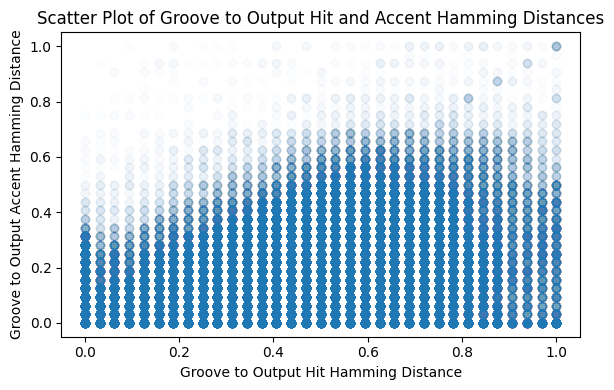

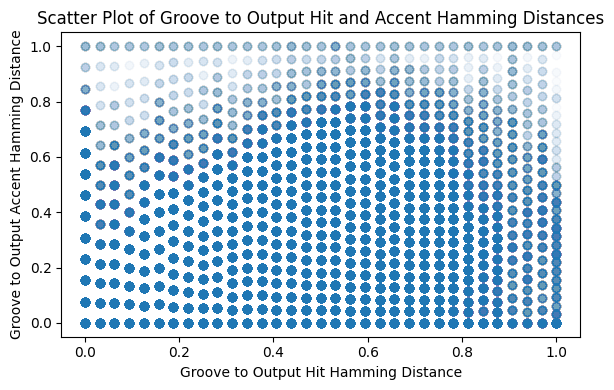

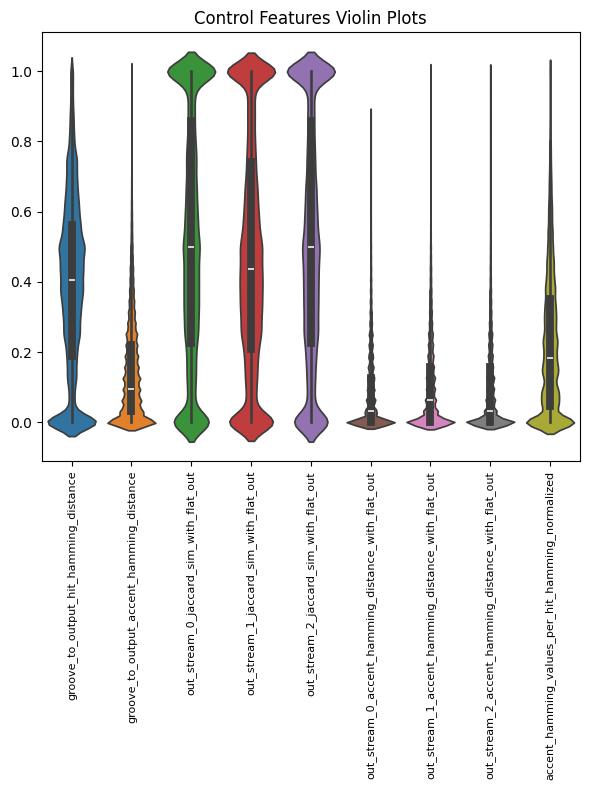

In [44]:
plot_scatter_input_output_distribution(control_features_df, use_normalized_accents=False)
plot_scatter_input_output_distribution(control_features_df, use_normalized_accents=True)
plot_control_features_violin(control_features_df)

In [45]:
# plot histogram of Accent hamming for hit distance of n (actual distance will be n*1./31.)
def plot_histogram_accent_hamming_distance(control_features_df, hit_hamming_distance_index=0):
    """
    Plot histogram of accent hamming distance for hit distance of n (actual distance will be n*1./32.)
    :param control_features_df: pd.DataFrame
        DataFrame containing the control features.
    :param hit_hamming_distance_index: int
        The index of the hit hamming distance to plot.
    """
    plt.figure(figsize=(6, 4))
    hit_hamming_distance = control_features_df["groove_to_output_hit_hamming_distance"]
    accent_hamming_distance = control_features_df["groove_to_output_accent_hamming_distance"]

    plt.hist(accent_hamming_distance[hit_hamming_distance == hit_hamming_distance_index/32.0], bins=30, alpha=0.7)
    plt.xlabel("Accent Hamming Distance")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Accent Hamming Distance for Hit Distance {hit_hamming_distance_index}")
    plt.tight_layout()
    plt.show()

# create a grid of 4 x 8 figures with the histogram of accent hamming distance for hit distance of n (actual distance will be n*1./32.)
def plot_histogram_accent_hamming_distance_grid(control_features_df, hit_hamming_distance_index=0):
    """
    Plot histogram of accent hamming distance for hit distance of n (actual distance will be n*1./32.)
    :param control_features_df: pd.DataFrame
        DataFrame containing the control features.
    :param hit_hamming_distance_index: int
        The index of the hit hamming distance to plot.
    """
    fig, axs = plt.subplots(4, 8, figsize=(16, 8))
    axs = axs.flatten()

    for i in range(32):
        hit_hamming_distance = control_features_df["groove_to_output_hit_hamming_distance"]
        accent_hamming_distance = control_features_df["groove_to_output_accent_hamming_distance"]

        axs[i].hist(accent_hamming_distance[hit_hamming_distance == i/32.0], bins=30, alpha=0.7)
        axs[i].set_xlabel("Accent Hamming Distance")
        axs[i].set_ylabel("Frequency")
        axs[i].set_title(f"Hit Distance {i}")

    plt.tight_layout()
    plt.show()

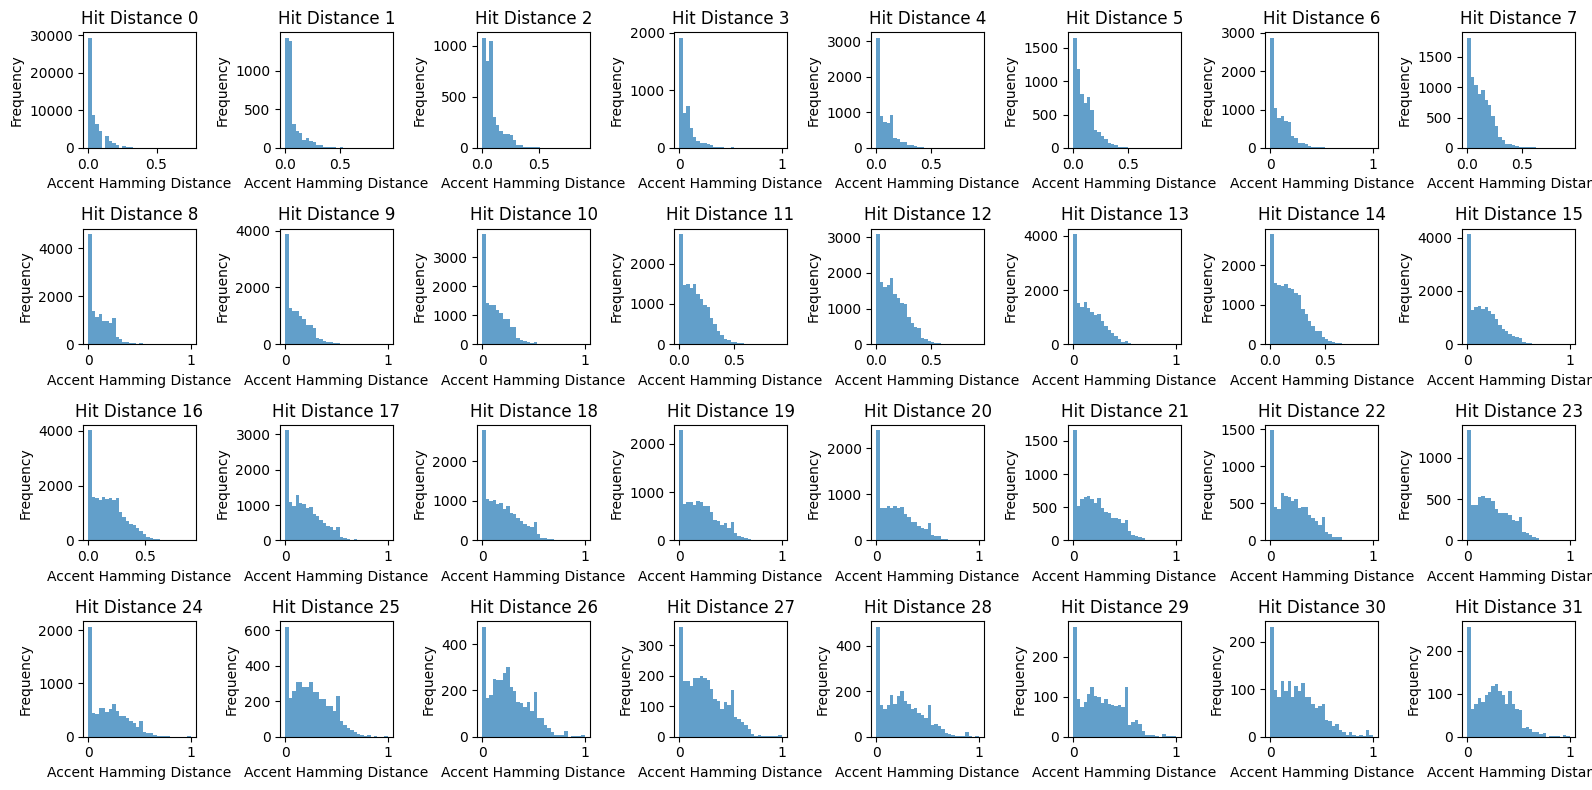

In [46]:
plot_histogram_accent_hamming_distance_grid(control_features_df, hit_hamming_distance_index=32)

In [ ]:
plot_scatter_input_output_distribution(control_features_static_groove_df, use_normalized_accents=False)
plot_scatter_input_output_distribution(control_features_static_groove_df, use_normalized_accents=True)

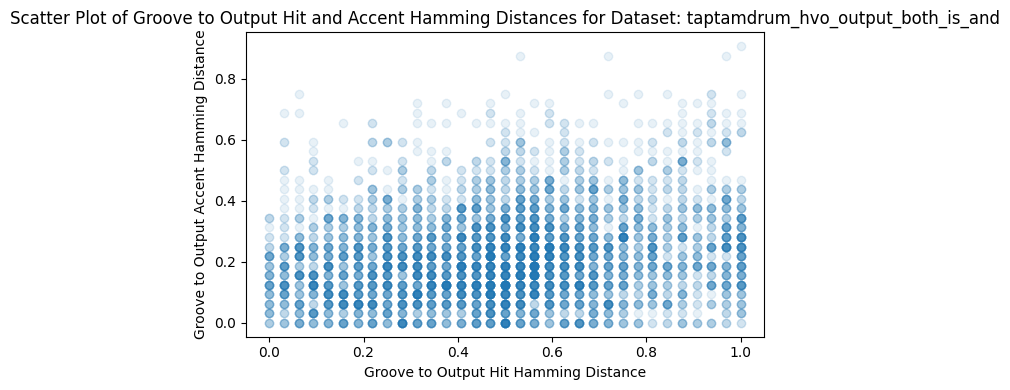

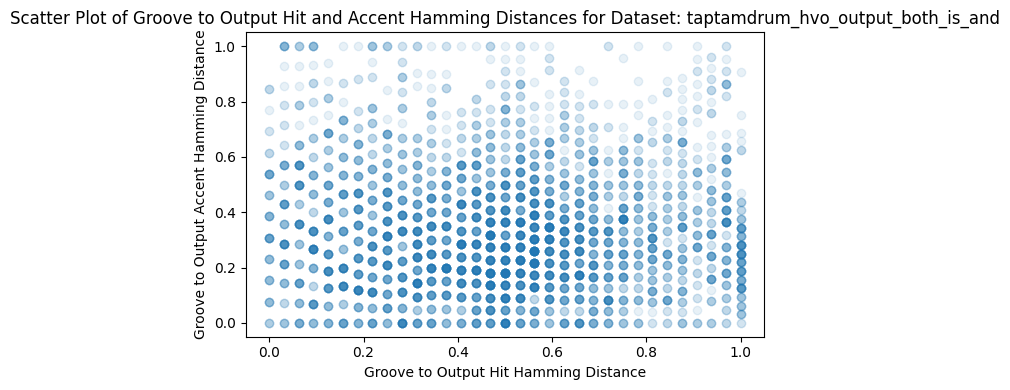

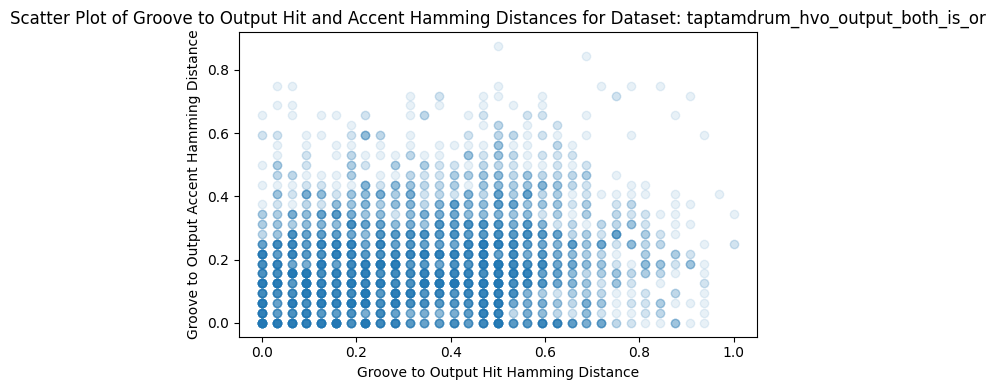

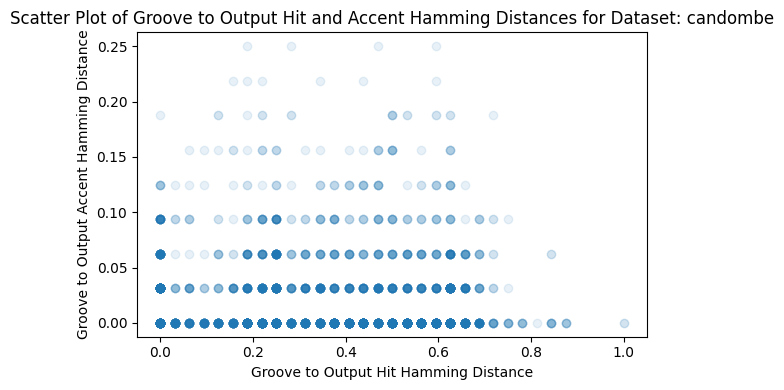

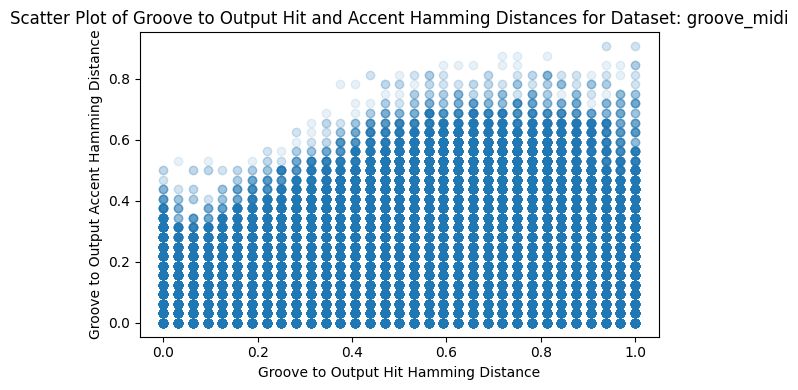

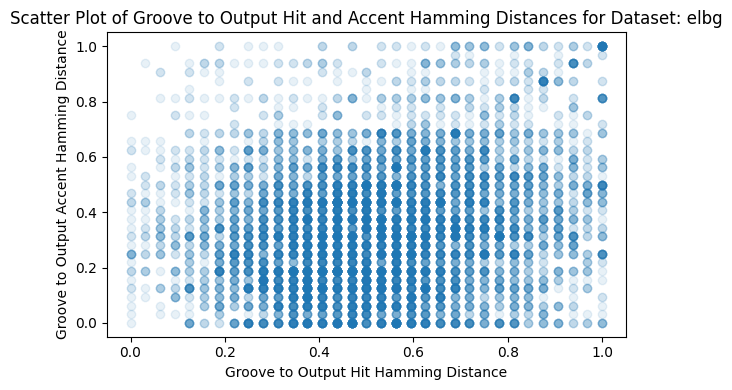

In [ ]:
plot_scatter_input_output_distribution_for_dataset(control_features_df, 'taptamdrum_hvo_output_both_is_and', use_normalized_accents=False)

plot_scatter_input_output_distribution_for_dataset(control_features_df, 'taptamdrum_hvo_output_both_is_or', use_normalized_accents=False)
#plot_scatter_input_output_distribution_for_dataset(control_features_df, 'taptamdrum_hvo_output_both_is_or', use_normalized_accents=True)

plot_scatter_input_output_distribution_for_dataset(control_features_df, 'candombe', use_normalized_accents=False)
#plot_scatter_input_output_distribution_for_dataset(control_features_df, 'candombe', use_normalized_accents=True)

plot_scatter_input_output_distribution_for_dataset(control_features_df, 'groove_midi', use_normalized_accents=False)
#plot_scatter_input_output_distribution_for_dataset(control_features_df, 'groove_midi', use_normalized_accents=True)

plot_scatter_input_output_distribution_for_dataset(control_features_df, 'elbg', use_normalized_accents=False)
#plot_scatter_input_output_distribution_for_dataset(control_features_df, 'elbg', use_normalized_accents=True)

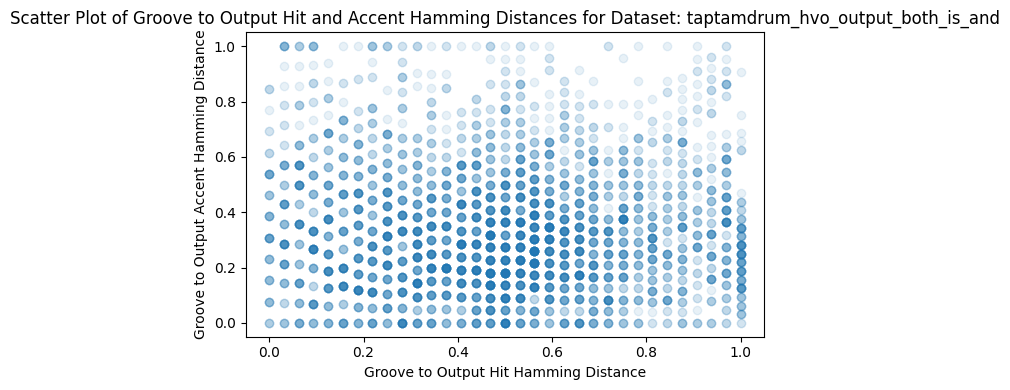

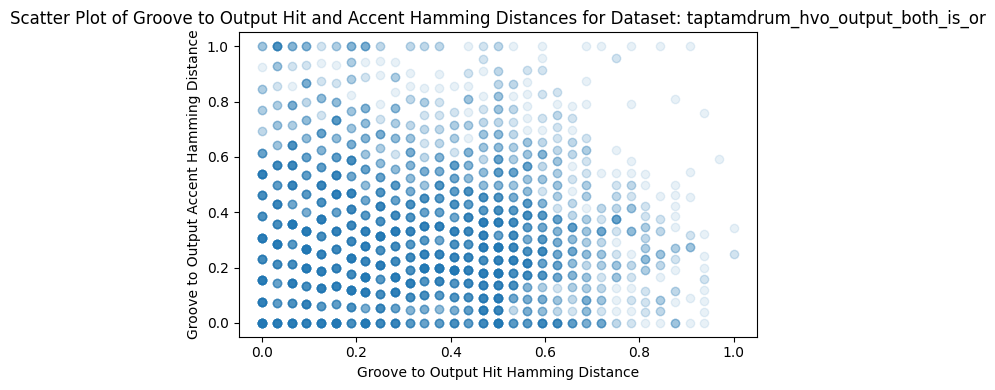

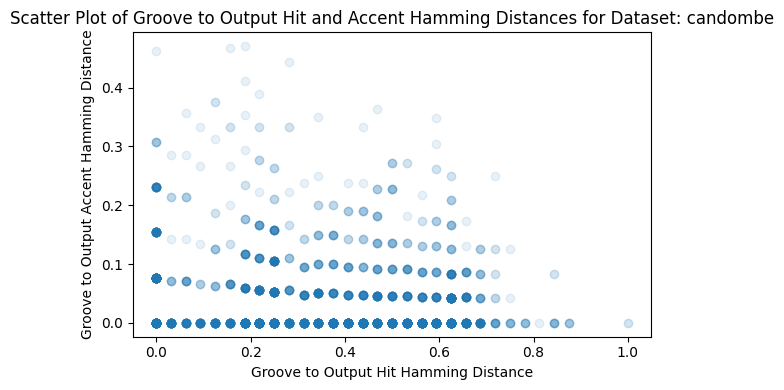

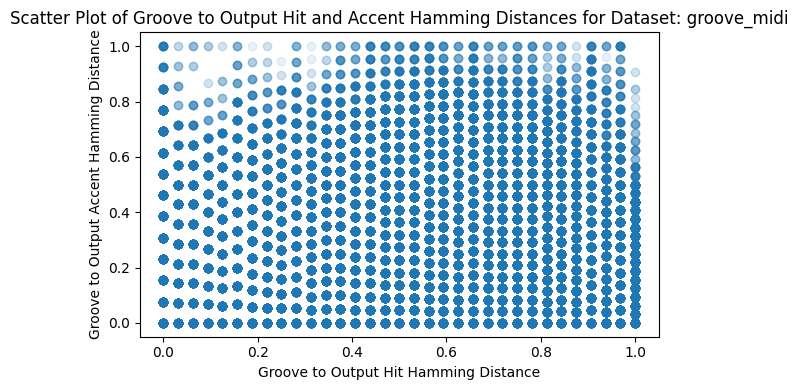

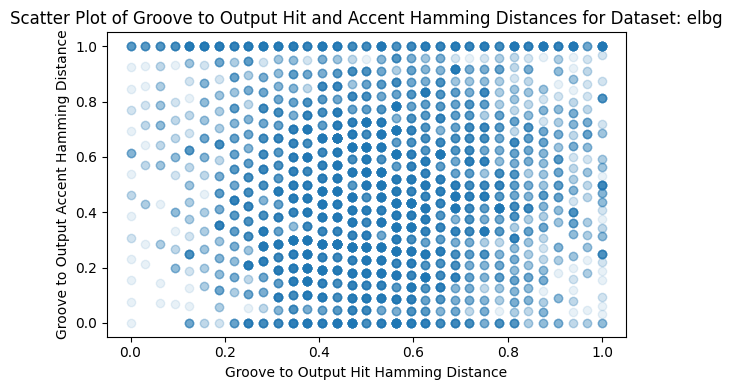

In [55]:
plot_scatter_input_output_distribution_for_dataset(control_features_df, 'taptamdrum_hvo_output_both_is_and', use_normalized_accents=True)

plot_scatter_input_output_distribution_for_dataset(control_features_df, 'taptamdrum_hvo_output_both_is_or', use_normalized_accents=True)

plot_scatter_input_output_distribution_for_dataset(control_features_df, 'candombe', use_normalized_accents=True)

plot_scatter_input_output_distribution_for_dataset(control_features_df, 'groove_midi', use_normalized_accents=True)

plot_scatter_input_output_distribution_for_dataset(control_features_df, 'elbg', use_normalized_accents=True)

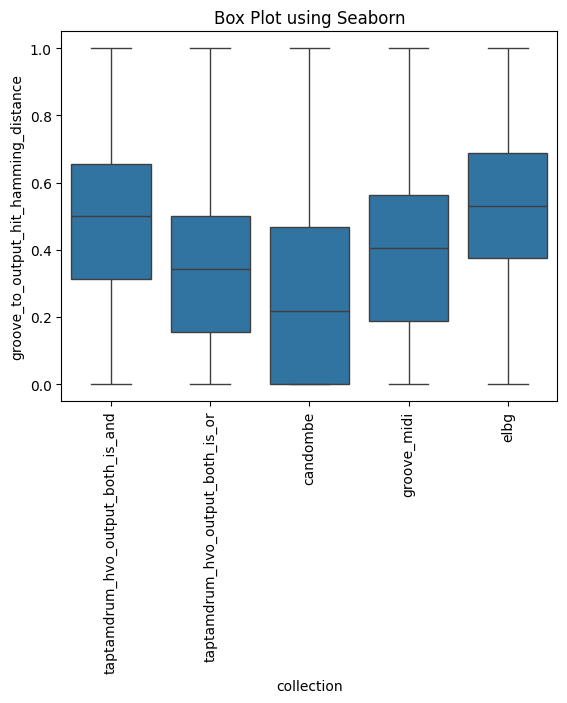

In [60]:
# Create boxplot
sns.boxplot(x='collection', y='groove_to_output_hit_hamming_distance', data=control_features_df)
plt.xticks(rotation=90)
plt.title('Box Plot using Seaborn')
plt.show()

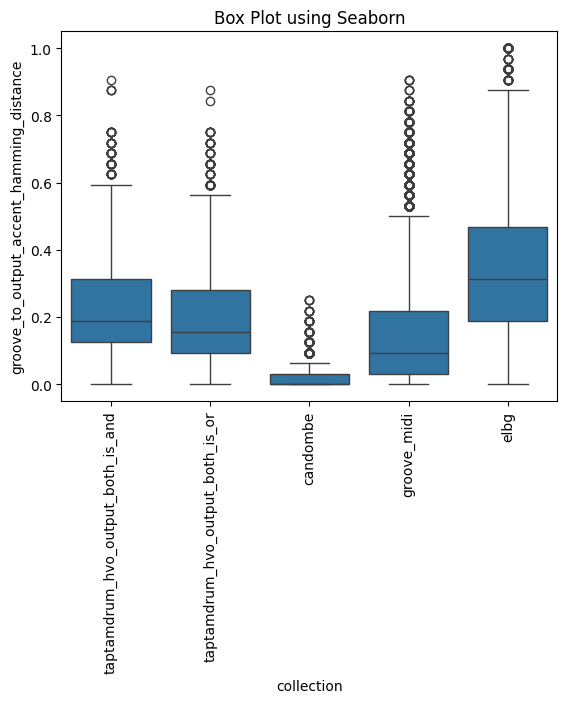

In [61]:
# Create boxplot
sns.boxplot(x='collection', y='groove_to_output_accent_hamming_distance', data=control_features_df)
plt.xticks(rotation=90)
plt.title('Box Plot using Seaborn')
plt.show()

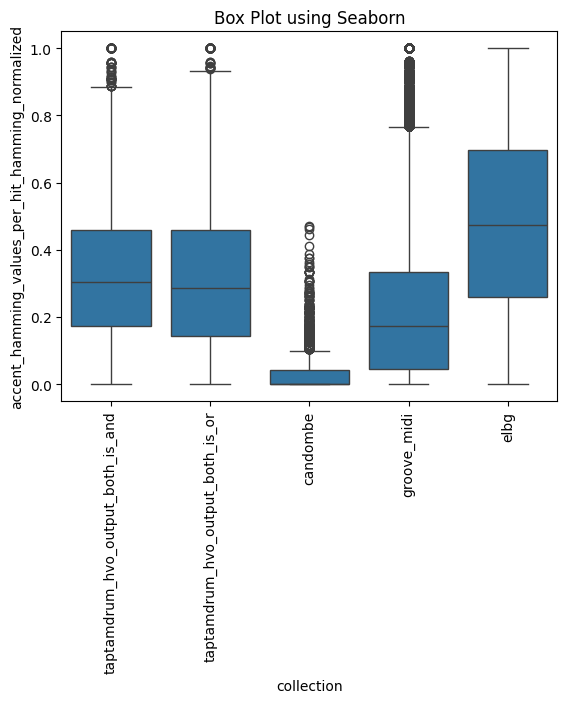

In [63]:
# Create boxplot
sns.boxplot(x='collection', y='accent_hamming_values_per_hit_hamming_normalized', data=control_features_df)
plt.xticks(rotation=90)
plt.title('Box Plot using Seaborn')
plt.show()

In [56]:
control_features_df

,sample_id,collection,groove_to_output_hit_hamming_distance,groove_to_output_accent_hamming_distance,out_stream_0_jaccard_sim_with_flat_out,out_stream_1_jaccard_sim_with_flat_out,out_stream_2_jaccard_sim_with_flat_out,out_stream_0_accent_hamming_distance_with_flat_out,out_stream_1_accent_hamming_distance_with_flat_out,out_stream_2_accent_hamming_distance_with_flat_out,accent_hamming_values_per_hit_hamming_normalized
0,203_p1_simple,taptamdrum_hvo_output_both_is_and,0.62500,0.12500,1.000000,0.166667,0.666667,0.00000,0.12500,0.25000,0.166667
1,203_p1_simple,taptamdrum_hvo_output_both_is_and,0.25000,0.12500,0.250000,0.250000,1.000000,0.00000,0.00000,0.12500,0.210526
2,203_p1_simple,taptamdrum_hvo_output_both_is_and,0.62500,0.12500,0.166667,1.000000,0.666667,0.12500,0.00000,0.25000,0.166667
3,203_p1_simple,taptamdrum_hvo_output_both_is_and,0.25000,0.25000,0.166667,1.000000,0.166667,0.12500,0.00000,0.12500,0.421053
4,345_p1_simple,taptamdrum_hvo_output_both_is_and,0.31250,0.34375,0.000000,0.333333,0.666667,0.15625,0.00000,0.15625,0.523810
...,...,...,...,...,...,...,...,...,...,...,...
352891,8593_attempt0,elbg,0.43750,0.53125,1.000000,0.533333,0.333333,0.03125,0.46875,0.46875,0.809524
352892,9204_attempt1,elbg,0.25000,0.00000,0.000000,0.000000,1.000000,0.00000,0.00000,0.00000,0.000000
352893,9204_attempt1,elbg,0.46875,0.00000,0.466667,0.000000,1.000000,0.00000,0.00000,0.00000,0.000000
352894,9204_attempt1,elbg,0.46875,0.00000,0.466667,0.000000,1.000000,0.00000,0.00000,0.00000,0.000000
